# Why this project?
I recently had the opportunity to read a new book written by my childhood hero and inspiration: Sir Alexander Ferguson CBE. The book was co-written by the legendary investor Sir Michael Jonathan Moritz KBE from Sequoia Capital, the firm which has invested in many of the tech companies that i'm applying for jobs! The book delved into the amazing time of Sir Alex Ferguson and how he turned Manchester United into a top team and brand around the globe. 
So, why this project? I love soccer. Also, the book mentioned a lot about how Sir Alex Ferguson embraced a lot of the new technology while maintaining his strong belief in disciplines and team chemistry. This lead to many variables that I haven't thought about before. Hence, I wanted to take a look at how teams in the League are performing based on some of the variables from the book.
Last but not least, I believe this is a good way for me to practice my understandings of a dataset as well as thinking about data in the modern business world.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df10 = pd.read_csv('C:/Users/vinhn/Desktop/epl_matches/E10.csv', parse_dates=True, header=0)
df11 = pd.read_csv('C:/Users/vinhn/Desktop/epl_matches/E11.csv', parse_dates=True, header=0)
df12 = pd.read_csv('C:/Users/vinhn/Desktop/epl_matches/E12.csv', parse_dates=True, header=0)
df13 = pd.read_csv('C:/Users/vinhn/Desktop/epl_matches/E13.csv', parse_dates=True, header=0)
df14 = pd.read_csv('C:/Users/vinhn/Desktop/epl_matches/E14.csv', parse_dates=True, header=0)
df15 = pd.read_csv('C:/Users/vinhn/Desktop/epl_matches/E15.csv', parse_dates=True, header=0)
df16 = pd.read_csv('C:/Users/vinhn/Desktop/epl_matches/E16.csv', parse_dates=True, header=0)
df17 = pd.read_csv('C:/Users/vinhn/Desktop/epl_matches/E17.csv', parse_dates=True, header=0)
df18 = pd.read_csv('C:/Users/vinhn/Desktop/epl_matches/E18.csv', parse_dates=True, header=0)

# What do we have in our dataset?
Div = League Division
Date = Match Date (dd/mm/yy)
HomeTeam = Home Team
AwayTeam = Away Team
FTHG and HG = Full Time Home Team Goals
FTAG and AG = Full Time Away Team Goals
FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)
HTHG = Half Time Home Team Goals
HTAG = Half Time Away Team Goals
HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)

Match Statistics (where available)
Referee = Match Referee
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
HY = Home Team Yellow Cards
AY = Away Team Yellow Cards
HR = Home Team Red Cards
AR = Away Team Red Cards
HBP = Home Team Bookings Points (10 = yellow, 25 = red)
ABP = Away Team Bookings Points (10 = yellow, 25 = red)

In [16]:
#merging the tables
dataframes = [df10,df11,df12,df13,df14,df15,df16,df17,df18]
df = pd.concat(dataframes, ignore_index=True, sort=False,axis=0)

In [17]:
df.drop(df.columns[23:], axis=1,inplace=True)

In [18]:
df.head(50)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,14/08/10,Aston Villa,West Ham,3.0,0.0,H,2.0,0.0,H,...,11.0,2.0,15.0,15.0,16.0,7.0,1.0,2.0,0.0,0.0
1,E0,14/08/10,Blackburn,Everton,1.0,0.0,H,1.0,0.0,H,...,2.0,12.0,19.0,14.0,1.0,3.0,2.0,1.0,0.0,0.0
2,E0,14/08/10,Bolton,Fulham,0.0,0.0,D,0.0,0.0,D,...,9.0,7.0,12.0,13.0,4.0,8.0,1.0,3.0,0.0,0.0
3,E0,14/08/10,Chelsea,West Brom,6.0,0.0,H,2.0,0.0,H,...,13.0,4.0,10.0,10.0,3.0,1.0,1.0,0.0,0.0,0.0
4,E0,14/08/10,Sunderland,Birmingham,2.0,2.0,D,1.0,0.0,H,...,2.0,7.0,13.0,10.0,3.0,6.0,3.0,3.0,1.0,0.0
5,E0,14/08/10,Tottenham,Man City,0.0,0.0,D,0.0,0.0,D,...,18.0,7.0,13.0,16.0,10.0,3.0,0.0,2.0,0.0,0.0
6,E0,14/08/10,Wigan,Blackpool,0.0,4.0,A,0.0,3.0,A,...,6.0,7.0,8.0,11.0,6.0,4.0,1.0,1.0,0.0,0.0
7,E0,14/08/10,Wolves,Stoke,2.0,1.0,H,2.0,0.0,H,...,7.0,6.0,17.0,13.0,5.0,5.0,0.0,2.0,0.0,0.0
8,E0,15/08/10,Liverpool,Arsenal,1.0,1.0,D,0.0,0.0,D,...,4.0,7.0,13.0,15.0,9.0,11.0,1.0,3.0,1.0,1.0
9,E0,16/08/10,Man United,Newcastle,3.0,0.0,H,2.0,0.0,H,...,10.0,3.0,9.0,5.0,5.0,3.0,2.0,2.0,0.0,0.0


In [6]:
len(df)

3241

In [19]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

# Exploratory analysis and calculating insightful variables

In [8]:
champions = [{'Team': 'ManUnited','Cup': 2},
             {'Team':'ManCity','Cup':3},
             {'Team':'Chelsea','Cup':2},
             {'Team':'LeicesterCity','Cup':1}]
championsdf = pd.DataFrame(champions)

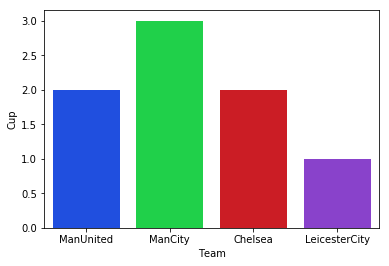

In [9]:
championsplot = sns.barplot(data = championsdf, x = 'Team', y ='Cup', palette='bright')

In [21]:
type(df.at[0,'FTHG']) 
df['Point_at_home'] = np.where(df['FTHG'] > df['FTAG'], 3, 
        np.where(df['FTHG'] == df['FTAG'], 1, 0))

In [22]:
df.tail(10)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Point_at_home
3231,E0,29/12/2018,Brighton,Everton,1.0,0.0,H,0.0,0.0,D,...,4.0,10.0,11.0,6.0,6.0,0.0,2.0,0.0,0.0,3
3232,E0,29/12/2018,Fulham,Huddersfield,1.0,0.0,H,0.0,0.0,D,...,5.0,12.0,10.0,4.0,3.0,3.0,1.0,0.0,0.0,3
3233,E0,29/12/2018,Leicester,Cardiff,0.0,1.0,A,0.0,0.0,D,...,3.0,14.0,16.0,10.0,4.0,0.0,2.0,0.0,0.0,0
3234,E0,29/12/2018,Liverpool,Arsenal,5.0,1.0,H,4.0,1.0,H,...,2.0,8.0,13.0,5.0,3.0,1.0,2.0,0.0,0.0,3
3235,E0,29/12/2018,Tottenham,Wolves,1.0,3.0,A,1.0,0.0,H,...,4.0,7.0,7.0,6.0,7.0,3.0,2.0,0.0,0.0,0
3236,E0,29/12/2018,Watford,Newcastle,1.0,1.0,D,0.0,1.0,A,...,2.0,17.0,16.0,3.0,6.0,1.0,2.0,0.0,0.0,1
3237,E0,30/12/2018,Burnley,West Ham,2.0,0.0,H,2.0,0.0,H,...,4.0,15.0,11.0,5.0,5.0,1.0,4.0,0.0,0.0,3
3238,E0,30/12/2018,Crystal Palace,Chelsea,0.0,1.0,A,0.0,0.0,D,...,4.0,11.0,8.0,3.0,4.0,0.0,1.0,0.0,0.0,0
3239,E0,30/12/2018,Man United,Bournemouth,4.0,1.0,H,3.0,1.0,H,...,3.0,10.0,7.0,4.0,5.0,2.0,0.0,1.0,0.0,3
3240,E0,30/12/2018,Southampton,Man City,1.0,3.0,A,1.0,3.0,A,...,6.0,11.0,10.0,3.0,8.0,2.0,3.0,1.0,0.0,0


In [73]:
hst = df.groupby(by = 'HomeTeam', as_index = False).agg({'HST': sum,'FTHG':sum,'Point_at_home':sum,'HS':sum,
                                                        'HF':sum,'HR':sum,'HY':sum,'AS':sum,'FTHG':sum,'FTAG':sum})
hst['HS-AS'] =hst['HS'] - hst['AS'] 
hst['Conversion_rate_Shot_on_target_to_goals'] = (hst.FTHG/ hst.HST)
hst['Card_to_Foul_ratio'] = (hst.HR + hst.HY) / hst.HF
hst['Cards'] = hst.HR + hst.HY

In [74]:
hst.sort_values('Card_to_Foul_ratio', ascending=True)

,HomeTeam,HST,FTHG,Point_at_home,HS,HF,HR,HY,AS,FTAG,HS-AS,Conversion_rate_Shot_on_target_to_goals,Card_to_Foul_ratio,Cards
4,Blackpool,134.0,30.0,20,253.0,216.0,0.0,22.0,260.0,37.0,-7.0,0.223881,0.101852,22.0
17,Liverpool,1222.0,327.0,328,2928.0,1597.0,6.0,181.0,1392.0,137.0,1536.0,0.267594,0.117095,187.0
5,Bolton,316.0,57.0,51,513.0,458.0,6.0,52.0,494.0,63.0,19.0,0.180380,0.126638,58.0
16,Leicester,377.0,131.0,143,1149.0,892.0,7.0,108.0,1041.0,97.0,108.0,0.347480,0.128924,115.0
24,Reading,85.0,23.0,20,161.0,169.0,1.0,21.0,286.0,33.0,-125.0,0.270588,0.130178,22.0
19,Man United,1145.0,328.0,367,2552.0,1759.0,7.0,230.0,1528.0,129.0,1024.0,0.286463,0.134736,237.0
11,Crystal Palace,444.0,116.0,124,1358.0,1227.0,4.0,162.0,1248.0,134.0,110.0,0.261261,0.135289,166.0
2,Birmingham,77.0,19.0,26,182.0,192.0,2.0,24.0,259.0,22.0,-77.0,0.246753,0.135417,26.0
25,Southampton,653.0,182.0,179,1819.0,1330.0,11.0,171.0,1279.0,146.0,540.0,0.278714,0.136842,182.0
33,Wigan,425.0,70.0,63,747.0,672.0,2.0,90.0,611.0,100.0,136.0,0.164706,0.136905,92.0


In [26]:
print('Mean: ',hst['Conversion_rate_Shot_on_target_to_goals'].mean(),', ','Median: ',hst['Conversion_rate_Shot_on_target_to_goals'].median())

Mean:  0.2624634324537121 ,  Median:  0.26759410801963995


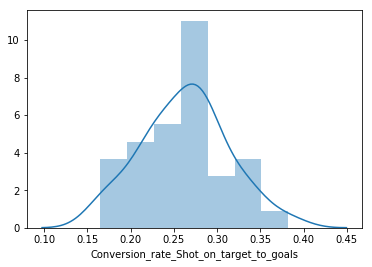

In [27]:
sns.distplot(hst.Conversion_rate_Shot_on_target_to_goals);

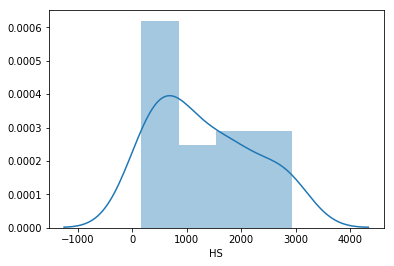

In [28]:
sns.distplot(hst.HS);

In [29]:
print('Mean: ',hst['HS-AS'].mean(),', ','Median: ',hst['HS-AS'].median())
#Mean much higher than median consistent with right-skewed and outliers.

Mean:  271.77142857142854 ,  Median:  59.0


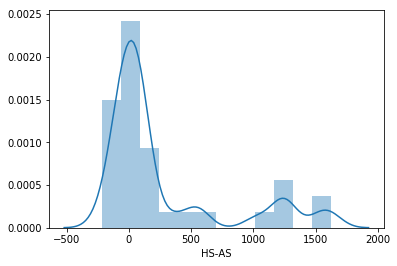

In [30]:
sns.distplot(hst['HS-AS']);

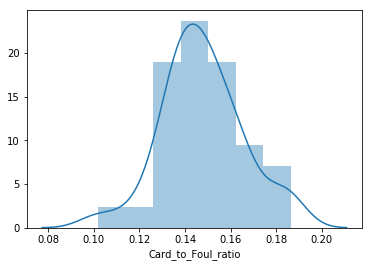

In [31]:
sns.distplot(hst.Card_to_Foul_ratio);

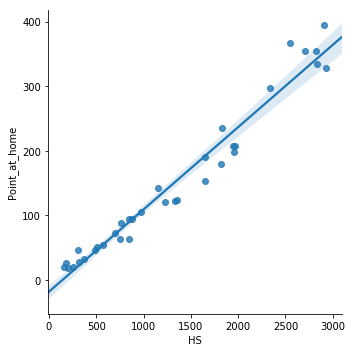

In [32]:
sns.lmplot('HS','Point_at_home',hst,scatter=True,fit_reg =True);

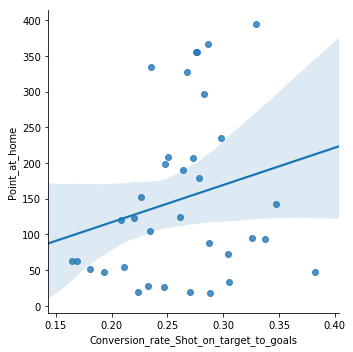

In [34]:
sns.lmplot('Conversion_rate_Shot_on_target_to_goals','Point_at_home',hst,scatter=True);

This is 'funny': the more the team fouled (tackled against the rules)
the more points that team got at home.
the home fans loves it. Dirty, but effective.
Top 1 for number of fouls is Man United (my fav team)

A different intepretation: However, we should keep in mind that these are fouls called by the referee. Which means the team might have been treated poorly by the referee as well.

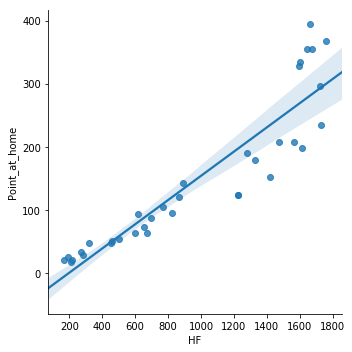

In [35]:
sns.lmplot('HF','Point_at_home',hst,scatter=True);

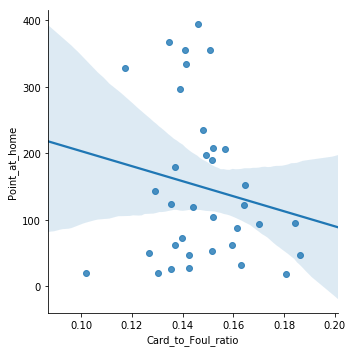

In [36]:
sns.lmplot('Card_to_Foul_ratio','Point_at_home',hst,scatter=True);

Although more cards might also mean you are playing more games, it shows within both of these charts the relationship between cards (serious fouls) and the number of goals (both home goals and away goals) scored by teams.

In [76]:
print('Correlation between Cards and Home goals: ',hst['Cards'].corr(hst['FTHG']))
print('Correlation between Cards and Away goals: ',hst['Cards'].corr(hst['FTAG']))

Correlation between Cards and Home goals:  0.8639504582033772
Correlation between Cards and Away goals:  0.9245765784811862


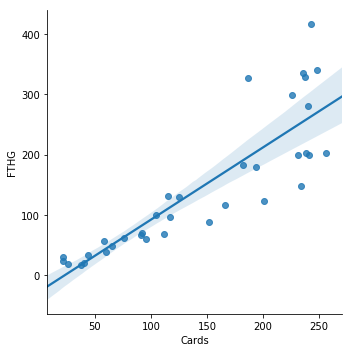

In [70]:
sns.lmplot('Cards','FTHG',hst,scatter=True);

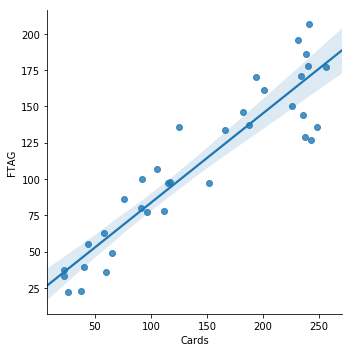

In [75]:
sns.lmplot('Cards','FTAG',hst,scatter=True);

# Demonstration of a terrible Pie chart: I also heard that pie charts are the worse :(

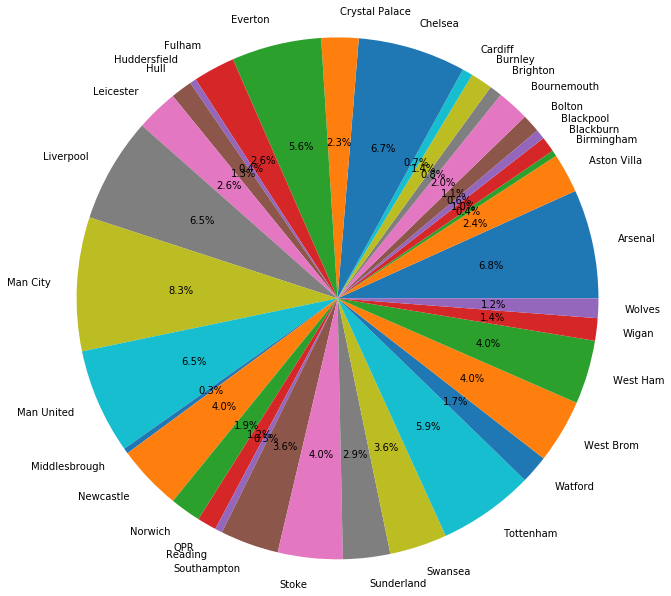

In [38]:
#pie chart home team goals
plt.axis('equal')
plt.pie(hst.FTHG,labels = hst.HomeTeam, radius = 3, autopct='%0.1f%%');

In [39]:
#What percentage of the matches where the result didn't change after the half time?
df['half_and_final_same'] = np.where(df.HTR == df.FTR,1,0)
no_change_results= sum(df.half_and_final_same)/df.shape[0]
print(no_change_results)

0.6059858068497377


In [40]:
df['Draw_at_half'] = np.where(df.HTR =='D', 1,0)
draw_athalf = sum(df.Draw_at_half) / df.shape[0]
print(draw_athalf)

0.41653810552298676


In [41]:
df['Draw_at_full'] = np.where(df.FTR =='D', 1,0)
draw_atfull = sum(df.Draw_at_full) / df.shape[0]
print(draw_atfull)

0.2505399568034557


# Applying Bayes Theorem (naive case where we assume independent)

I will have to double check and continuously work on my understanding of this section. As a newbie practioner, I'm still practicing these assumptions. I will admit i'm not entirely sure about this part:

P(B|A) = (P(A|B) * P(B)) / P(A)

Probability half time result = draw given that full time result was a draw

We know p(A = draw at full time) =  draw_atfull= 0.2505

We know p(B = draw at half time) = draw_athalf = 0.4165

We need to calculate P(A|B) which is prob. draw at full given draw at half-time.

In [42]:
df['ab'] = np.where(np.logical_and(df.HTR == 'D', df.FTR == 'D'),1,0)
ab = sum(df.ab) / df.shape[0]
print(ab)

0.15612465288491206


In [62]:
#P(B|A)
Prob_half_draw_given_full_draw = (ab*draw_athalf) /(draw_atfull)
print(Prob_half_draw_given_full_draw)

0.2595668490081666


In [44]:
# What % of reversed result after the half? (draw counted as reversed as well)
df['reversed'] = np.where(np.logical_and(df.HTR != df.FTR, df.HTHG != df.HTAG),1,0)
reversed_afterhalf = sum(df.reversed) / df.shape[0]
print(reversed_afterhalf)

0.1336007405121876


In the U.S., one of the complaints about soccer is the fact that the game doesn't have a lot of action aka scores/goals
like other sports like Basketball, Football, Pingpong... Let's take a look at games that noone scores on both sides.
The results shows only 7.68% of the games ended in a 0-0 tie. A bit of exaggeration going on here. However, looking above, we could see 40% of the games draw at half time... which is 45 minutes into the game. This is quite disappointing in my opinion as the soccer styles around the globe has been more defensive (no thanks to Mr. Mourinho).

In [45]:
# Americans like to say soccer tie with no goals too much. Let's check this out?
df['tie00'] = np.where(np.logical_and(df.FTHG == df.FTAG,df.FTHG==0 ),1,0)
tie00_percentage = sum(df.tie00) / df.shape[0]
print(tie00_percentage)

0.07682813946312866


In [46]:
len(df[(df.FTR == 'H')]) / df.shape[0]

0.455106448626967

In [47]:
df['Home_Win'] = np.where(df.FTR == 'H', 1,0)
home_win = df.groupby(by = 'HomeTeam', as_index=False).agg({'Home_Win': sum}).sort_values(by = 'Home_Win', ascending  = False).head(10)
print(home_win)

      HomeTeam  Home_Win
18    Man City       124
19  Man United       113
0      Arsenal       107
10     Chelsea       107
29   Tottenham       100
17   Liverpool        94
12     Everton        85
26       Stoke        64
21   Newcastle        58
32    West Ham        57


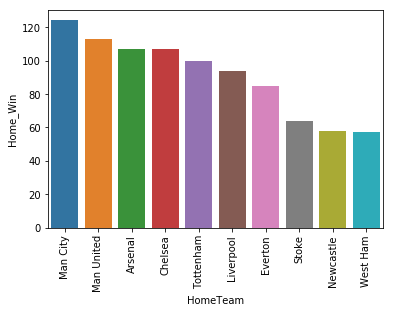

In [48]:
homewinplot = sns.barplot(data=home_win.head(10), x='HomeTeam', y = 'Home_Win')
plt.xticks(rotation=90)
plt.show()

In [49]:
df.groupby(by = 'HomeTeam').agg({'HS':sum,'AS':sum}).sort_values(by = 'AS', ascending = False)

,HS,AS
HomeTeam,,
West Ham,1945.0,1865.0
West Brom,1953.0,1835.0
Stoke,1830.0,1832.0
Everton,2340.0,1785.0
Sunderland,1654.0,1763.0
Newcastle,1969.0,1620.0
Swansea,1647.0,1612.0
Chelsea,2825.0,1581.0
Tottenham,2832.0,1569.0


# II. Going into some away stats

In [78]:
df['Point_away'] = np.where(df.FTR =='A',3,np.where(df.FTR =='D',1,0))
away_shot = df.groupby(by = 'AwayTeam').agg({'AS':sum,'Point_away':sum}).sort_values(by = 'Point_away', ascending = False)
away_shot

,AS,Point_away
AwayTeam,,
Man City,2448.0,299
Chelsea,2283.0,280
Tottenham,2292.0,279
Man United,1921.0,276
Arsenal,2127.0,257
Liverpool,2289.0,254
Everton,1855.0,179
West Brom,1555.0,144
Southampton,1487.0,138


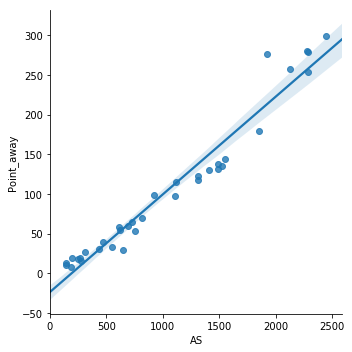

In [79]:
sns.lmplot('AS','Point_away', away_shot, scatter=True);

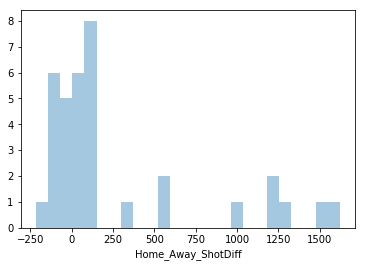

In [52]:
HS_AS= df.groupby(by = 'HomeTeam',as_index=False).agg({'HS':sum,'AS':sum}).sort_values(by = 'AS', ascending = False)
HS_AS['Home_Away_ShotDiff'] = HS_AS['HS'] -HS_AS['AS']
HS_AS_sorted = HS_AS.sort_values(by = 'Home_Away_ShotDiff', ascending = False)
HS_AS_sorted

sns.distplot(HS_AS_sorted.Home_Away_ShotDiff, kde=False, bins= 25);

In [53]:
df.groupby(by = ['Referee','HomeTeam']).agg({'Date': 'nunique','Point_away': 'sum'}).sort_values(by ='Point_away', ascending = False).head(15)

,,Date,Point_away
Referee,HomeTeam,,
A Taylor,Stoke,14,26
M Dean,West Brom,15,25
N Swarbrick,Aston Villa,10,24
M Jones,Sunderland,12,23
M Atkinson,Sunderland,13,23
J Moss,Swansea,12,23
A Marriner,Newcastle,15,23
L Probert,West Brom,10,23
A Marriner,West Ham,13,22


In [54]:
ref_hometeam = df.groupby(by = ['Referee','HomeTeam'], as_index=False).agg({'Date': 'nunique'}).sort_values(by ='Date', ascending = False)
ref_hometeam.head(15)

,Referee,HomeTeam,Date
330,M Atkinson,Newcastle,21
400,M Dean,Tottenham,20
2,A Marriner,Arsenal,18
390,M Dean,Man City,17
449,M Jones,Tottenham,16
472,M Oliver,Liverpool,15
257,L Mason,Chelsea,15
374,M Dean,Arsenal,15
467,M Oliver,Everton,15
402,M Dean,West Brom,15


In [55]:
Atkinson = ref_hometeam[ref_hometeam.Referee == 'M Atkinson']

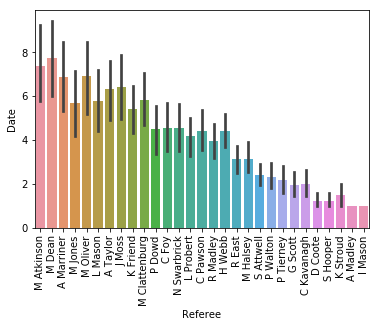

In [56]:
sns.barplot(data=ref_hometeam,x = 'Referee', y= 'Date')
plt.xticks(rotation=90)
plt.show()

In [57]:
df.groupby(by = ['Referee','AwayTeam'],).agg({'Date': 'nunique',}).sort_values(by ='Date', ascending = False).head(10)

Date
Referee       AwayTeam        
M Dean        Man United    20
              Chelsea       19
A Marriner    Man City      18
M Clattenburg Man City      17
A Marriner    Liverpool     17
M Atkinson    Man City      17
              Chelsea       16
A Marriner    Chelsea       16
A Taylor      Liverpool     16
M Atkinson    Liverpool     16

In [58]:
df.groupby(by = ['Referee','HomeTeam']).agg({'HR':sum,'AR':sum}).sort_values(by = 'HR', ascending = False).head(15)

HR   AR
Referee       HomeTeam              
A Marriner    Newcastle     4.0  0.0
M Clattenburg QPR           3.0  0.0
              Man United    3.0  0.0
M Atkinson    Arsenal       3.0  2.0
P Dowd        QPR           2.0  0.0
L Mason       Aston Villa   2.0  1.0
M Oliver      Stoke         2.0  1.0
N Swarbrick   Aston Villa   2.0  0.0
J Moss        Leicester     2.0  1.0
              Arsenal       2.0  1.0
P Dowd        Aston Villa   2.0  0.0
M Oliver      Huddersfield  2.0  1.0
C Pawson      Sunderland    2.0  0.0
              Chelsea       2.0  0.0
A Taylor      West Ham      2.0  1.0

In [59]:
ref_total = df.groupby(by = 'Referee').agg({'Referee': 'count'}).sort_values(by ='Referee', ascending = False)
ref_total.head(15)

,Referee
Referee,
M Dean,247
M Atkinson,236
M Oliver,221
A Marriner,213
A Taylor,209
L Mason,191
J Moss,186
K Friend,178
M Clattenburg,175


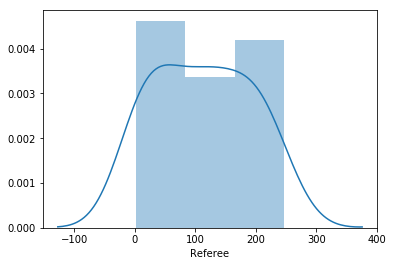

In [60]:
sns.distplot(ref_total.Referee)

As you can see, there are lots of interesting things a club could do to further enhance their results such as:
1. Take more shots
2. Tackle people more (aka fouling). This might lead to more injury time and more cards but the team should be taking care of their players. It would be interesting to have an experiment to find causal relationship between fouling more and scoring. Although we did conduct a correlation calculation and visualization of these two variables.
3. Referees do make a difference (Thanks Mike Dean for United win over Spurs!)
4. The result shows only 13.36% of the match where a team comeback from trailing at half time.
5. The results shows only 7.68% of the games ended in a 0-0 tie. A bit of exaggeration going on here. However, looking above, we could see 40% of the games draw at half time... which is 45 minutes into the game. This is quite disappointing in my opinion as the soccer styles around the globe has been more defensive (no thanks to Mr. Mourinho).
6. Given a full-time result was 0-0, there's a 26% chance the result was 0-0 at half time.